In [1]:
# %pip install --upgrade pillow wordcloud textblob

In [2]:
# %pip install seaborn matplotlib

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import wordcloud 
from wordcloud import WordCloud
from collections import Counter

import warnings

In [4]:
warnings.filterwarnings('ignore')

In [5]:
reviews_df = pd.read_csv(r'../final/updated_reviews.csv', encoding='latin-1')
orders_df = pd.read_csv(r'../final/updated_orders.csv')
order_items_df = pd.read_csv(r'../final/olist_order_items_dataset.csv')
customers_df = pd.read_csv(r'../final/olist_customers_dataset.csv')
products_df = pd.read_csv(r'../final/merged_products.csv')

In [6]:
customers_df.isnull().sum(), products_df.isnull().sum()

(customer_id                 0
 customer_unique_id          0
 customer_zip_code_prefix    0
 customer_city               0
 customer_state              0
 dtype: int64,
 product_id                       0
 product_category_name            0
 product_name_length              0
 product_description_length       0
 product_photos_qty               0
 product_weight_g                 0
 product_length_cm                0
 product_height_cm                0
 product_width_cm                 0
 product_category_name_english    0
 dtype: int64)

In [7]:
# New Reviews dataframe with filled na values to also keep the original reviews
reviews_updated = reviews_df.copy()
reviews_updated['review_comment_title'].fillna('', inplace=True)
reviews_updated['review_comment_message'].fillna('', inplace=True)

In [8]:
reviews_updated.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

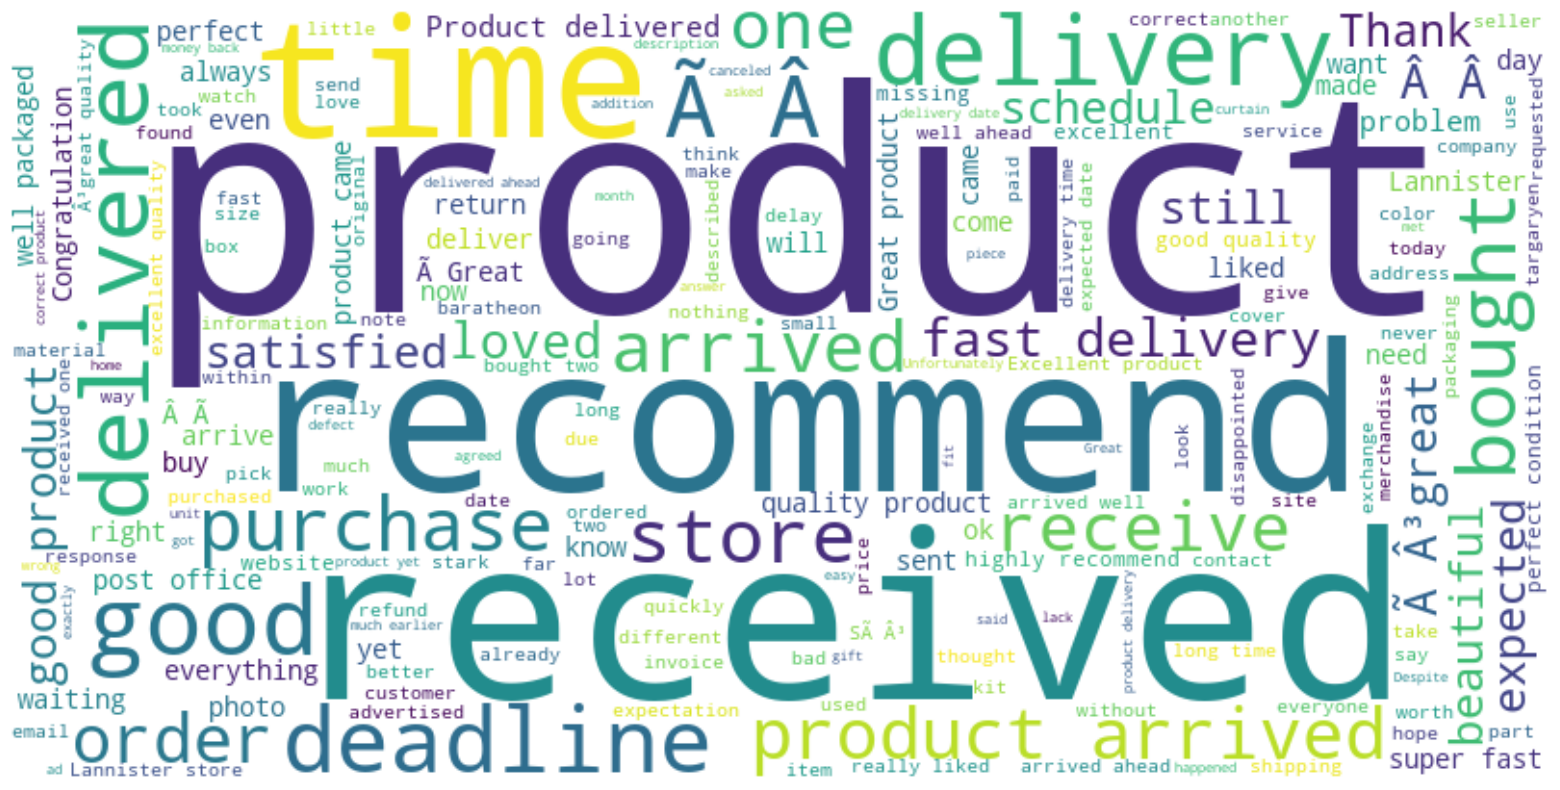

In [9]:
# Filter the dataset to only include non-null comment messages
filtered_data = reviews_df.dropna(subset=['review_comment_message'])

# Generate a word cloud for the review comment messages
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(filtered_data['review_comment_message']))

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

- For sentiment analysis, we look at the datasets that can give us relevant data for sentiment analysis (reviews, order, etc.) firstly. We load the datasets into the notebook and look at the nature of the data. To perform sentiment analysis, we mainly use the reviews dataset. We generated a word cloud from the review_comment_message column. The word cloud visualises the most common words used in the reviews. Larger words indicate higher frequency across the dataset, providing a quick visual representation of the themes and sentiments expressed by the reviewers. The word cloud contains keywords that express positive sentiments, mostly good and beautiful, and neutral words such as received and recommended. But we can also compare positive and negative words. Therefore, we also generated positive and negative word clouds separately to compare. 

In [10]:
# Categorize sentiment based on review scores
# reviews_df have rows with NA comments
reviews_df['sentiment'] = pd.cut(reviews_df['review_score'], bins=[0, 2, 3, 5], labels=['negative', 'neutral', 'positive'], right=True)
reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,sentiment
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:00,positive
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-10-03 00:00:00,2018-11-03 03:05:00,positive
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:00,positive
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,received it well before the stipulated time.,2017-04-21 00:00:00,2017-04-21 22:02:00,positive
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Congratulations Lannister stores I loved shopp...,2018-01-03 00:00:00,2018-02-03 10:26:00,positive
...,...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-09-12,2017-11-12 20:06:00,positive
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excellent backpack, super fast delivery. I hig...",2018-03-22,2018-03-23 09:10:00,positive
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-01-07,2018-02-07 12:59:00,positive
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,I ordered the purchase of a Celtic/Prism/Meriv...,2017-12-15,2017-12-16 01:29:00,negative


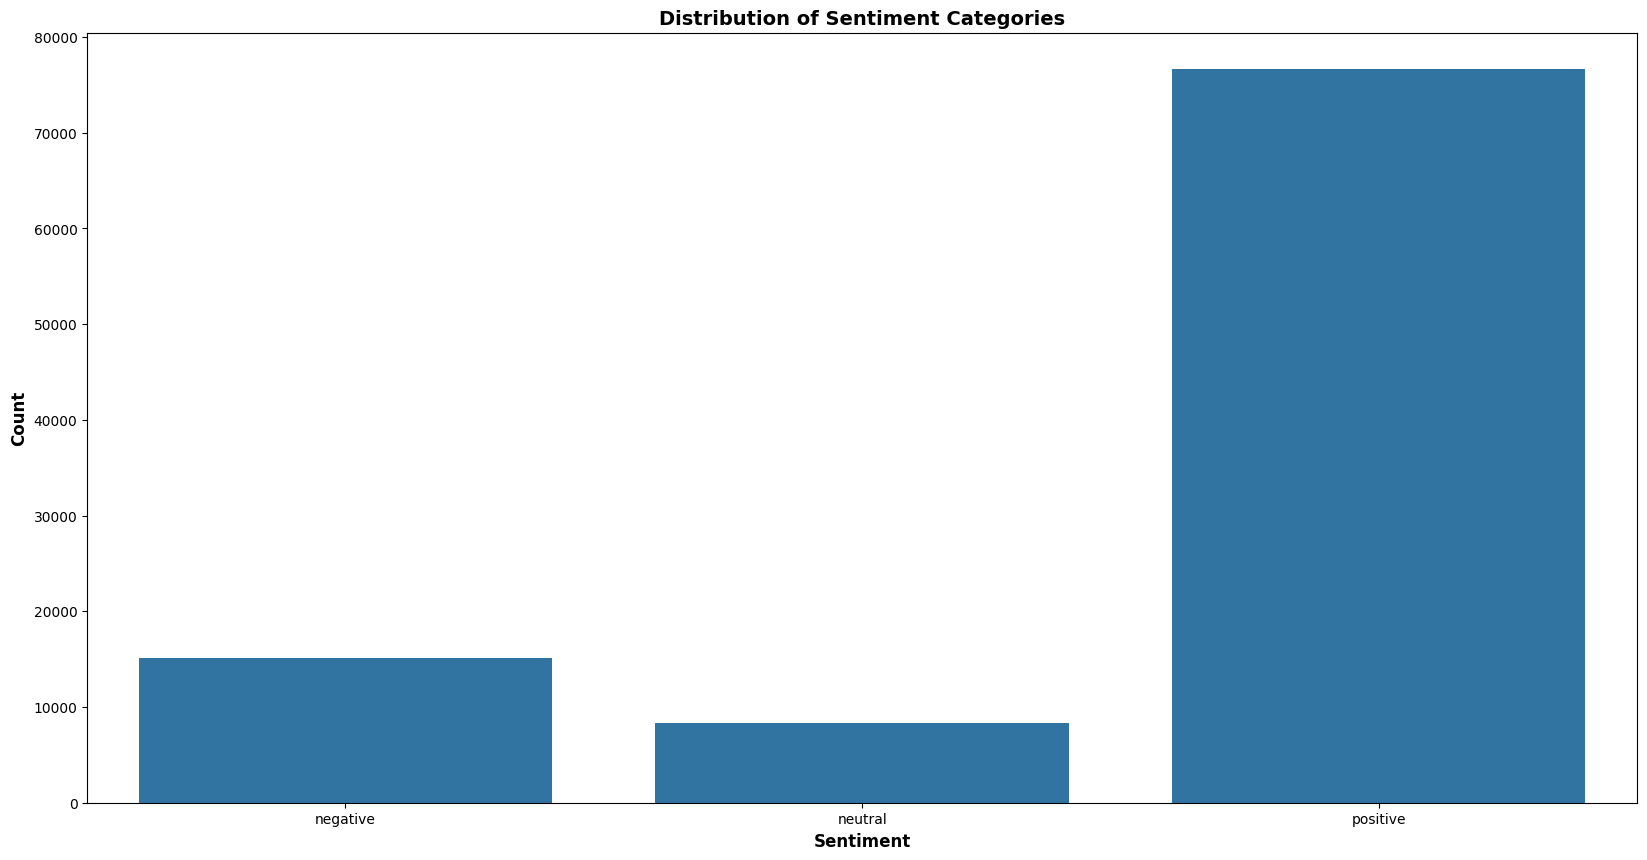

In [11]:
# Plotting the distribution of sentiments
plt.figure(figsize=(20,10))
sns.countplot(data=reviews_df, x='sentiment', order=['negative', 'neutral', 'positive'])
plt.title('Distribution of Sentiment Categories', fontsize=14, weight='bold')
plt.xlabel('Sentiment', fontsize=12, weight='bold')
plt.ylabel('Count', fontsize=12, weight='bold')
plt.show()

- In addition, we added a sentiment column with categorical data in the dataframe that reflects the numerical data of review scores. The categorical data allowed data grouping and filtering positive and negative data. The review scores are also counted and visualised to see the distribution of customer sentiments. We can see that we have the most positive reviews by analysing the review score meaning the reviews have mostly positive sentiment.

In [12]:
# Filter the data for positive and negative sentiments
positive_reviews = reviews_df[reviews_df['sentiment'] == 'positive']['review_comment_message'].dropna()
negative_reviews = reviews_df[reviews_df['sentiment'] == 'negative']['review_comment_message'].dropna()

positive_reviews, negative_reviews

(3             received it well before the stipulated time.
 4        Congratulations Lannister stores I loved shopp...
 9        efficient device. on the website the brand of ...
 12        But a little bit, getting stuck... for the pr...
 15       Reliable seller, ok product and delivery befor...
                                ...                        
 99971    We were very satisfied with the product, it me...
 99977    Original product, quick delivery time. Super s...
 99980    for this product I received according to the p...
 99983     Delivered within the time frame. Product arri...
 99996    Excellent backpack, super fast delivery. I hig...
 Name: review_comment_message, Length: 26671, dtype: object,
 16       I WOULD LIKE TO KNOW WHAT HAPPENED, I ALWAYS R...
 19                                                very bad
 29                        I didn't like it! I bought a pig
 32       always buy online and the delivery takes place...
 39                                 No 

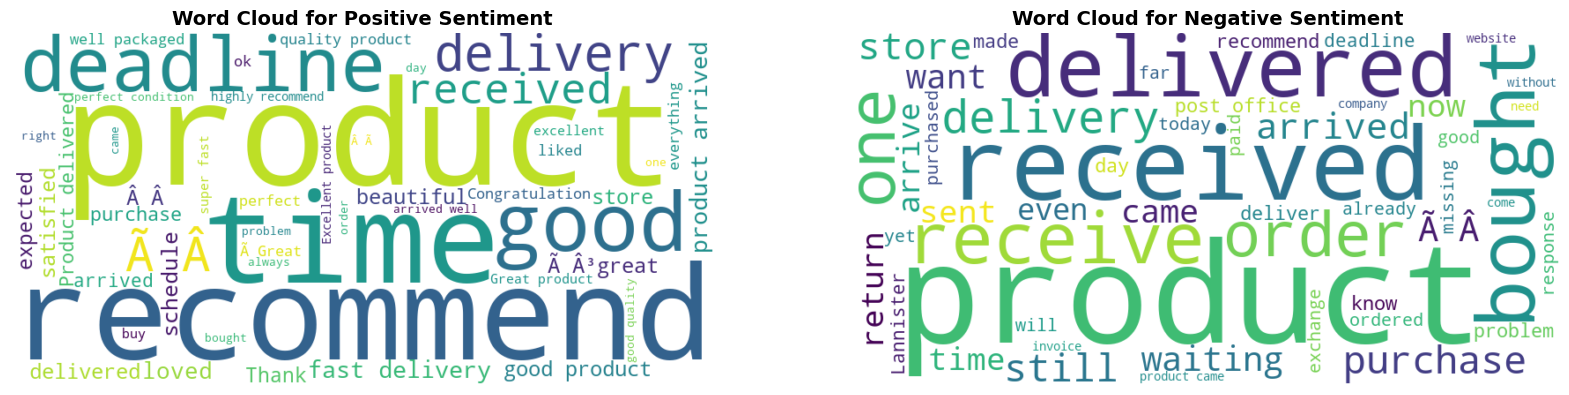

In [13]:
# Generate word clouds
wordcloud_positive = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(' '.join(positive_reviews))
wordcloud_negative = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(' '.join(negative_reviews))

# Display the word clouds
fig, ax = plt.subplots(1, 2, figsize=(20, 15))
ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Word Cloud for Positive Sentiment', fontsize=14, weight='bold')
ax[0].axis('off')

ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Word Cloud for Negative Sentiment', fontsize=14, weight='bold')
ax[1].axis('off')

plt.show()

- Here are the two separate word clouds for positive and negative sentiments respectively. In positive word cloud, we can see distinct key words such as 'good product', 'satisfied', 'recommend', and 'loved' whereas in the negative one, we can see the words 'still wating', 'return', and 'problem'. We can see that the word 'product' exists in both word clouds meaning that all messages include these keywords.

In [14]:
from textblob import TextBlob

In [15]:
polar_reviews = reviews_df['review_comment_message'].dropna()
type(polar_reviews), len(polar_reviews), polar_reviews

(pandas.core.series.Series,
 41743,
 3             received it well before the stipulated time.
 4        Congratulations Lannister stores I loved shopp...
 9        efficient device. on the website the brand of ...
 12        But a little bit, getting stuck... for the pr...
 15       Reliable seller, ok product and delivery befor...
                                ...                        
 99983     Delivered within the time frame. Product arri...
 99990    The product was not sent with an invoice, ther...
 99996    Excellent backpack, super fast delivery. I hig...
 99998    I ordered the purchase of a Celtic/Prism/Meriv...
 99999    my product arrived and I already have to retur...
 Name: review_comment_message, Length: 41743, dtype: object)

In [16]:
polarity = []
for text in polar_reviews:
    try:
        polarity.append(TextBlob(text).sentiment.polarity)
    except:
        polarity.append(0)

In [17]:
len(polarity)

41743

In [18]:
polar_reviews_df = pd.DataFrame()
polar_reviews_df = polar_reviews.reset_index()
polar_reviews_df.columns = ['Id','Review']
polar_reviews_df.tail(3)

,Id,Review
41740,99996,"Excellent backpack, super fast delivery. I hig..."
41741,99998,I ordered the purchase of a Celtic/Prism/Meriv...
41742,99999,my product arrived and I already have to retur...


In [19]:
polar_reviews_df['polarity'] = polarity
polar_reviews_df

,Id,Review,polarity
0,3,received it well before the stipulated time.,0.000000
1,4,Congratulations Lannister stores I loved shopp...,0.666667
2,9,efficient device. on the website the brand of ...,0.000000
3,12,"But a little bit, getting stuck... for the pr...",0.256250
4,15,"Reliable seller, ok product and delivery befor...",0.500000
...,...,...,...
41738,99983,Delivered within the time frame. Product arri...,0.906250
41739,99990,"The product was not sent with an invoice, ther...",0.214286
41740,99996,"Excellent backpack, super fast delivery. I hig...",0.433333
41741,99998,I ordered the purchase of a Celtic/Prism/Meriv...,-0.220238


In [20]:
# Filtering review messages with positive and negative polarity values
polar_pos = polar_reviews_df[polar_reviews_df['polarity'] > 0]
polar_neg = polar_reviews_df[polar_reviews_df['polarity'] < 0]

In [21]:
# Getting the commonly used keywords for positive sentiment
polar_pos_count = Counter(polar_pos['Review']).most_common(10)
polar_pos_count = pd.DataFrame(polar_pos_count)
polar_pos_count.columns=['Keyword','Count']
polar_pos_count

,Keyword,Count
0,Good,375
1,Very good,240
2,Great,183
3,very good,157
4,great,155
5,OK,141
6,Very good,69
7,Everything is OK,52
8,I liked,50
9,Ãvery good product,44


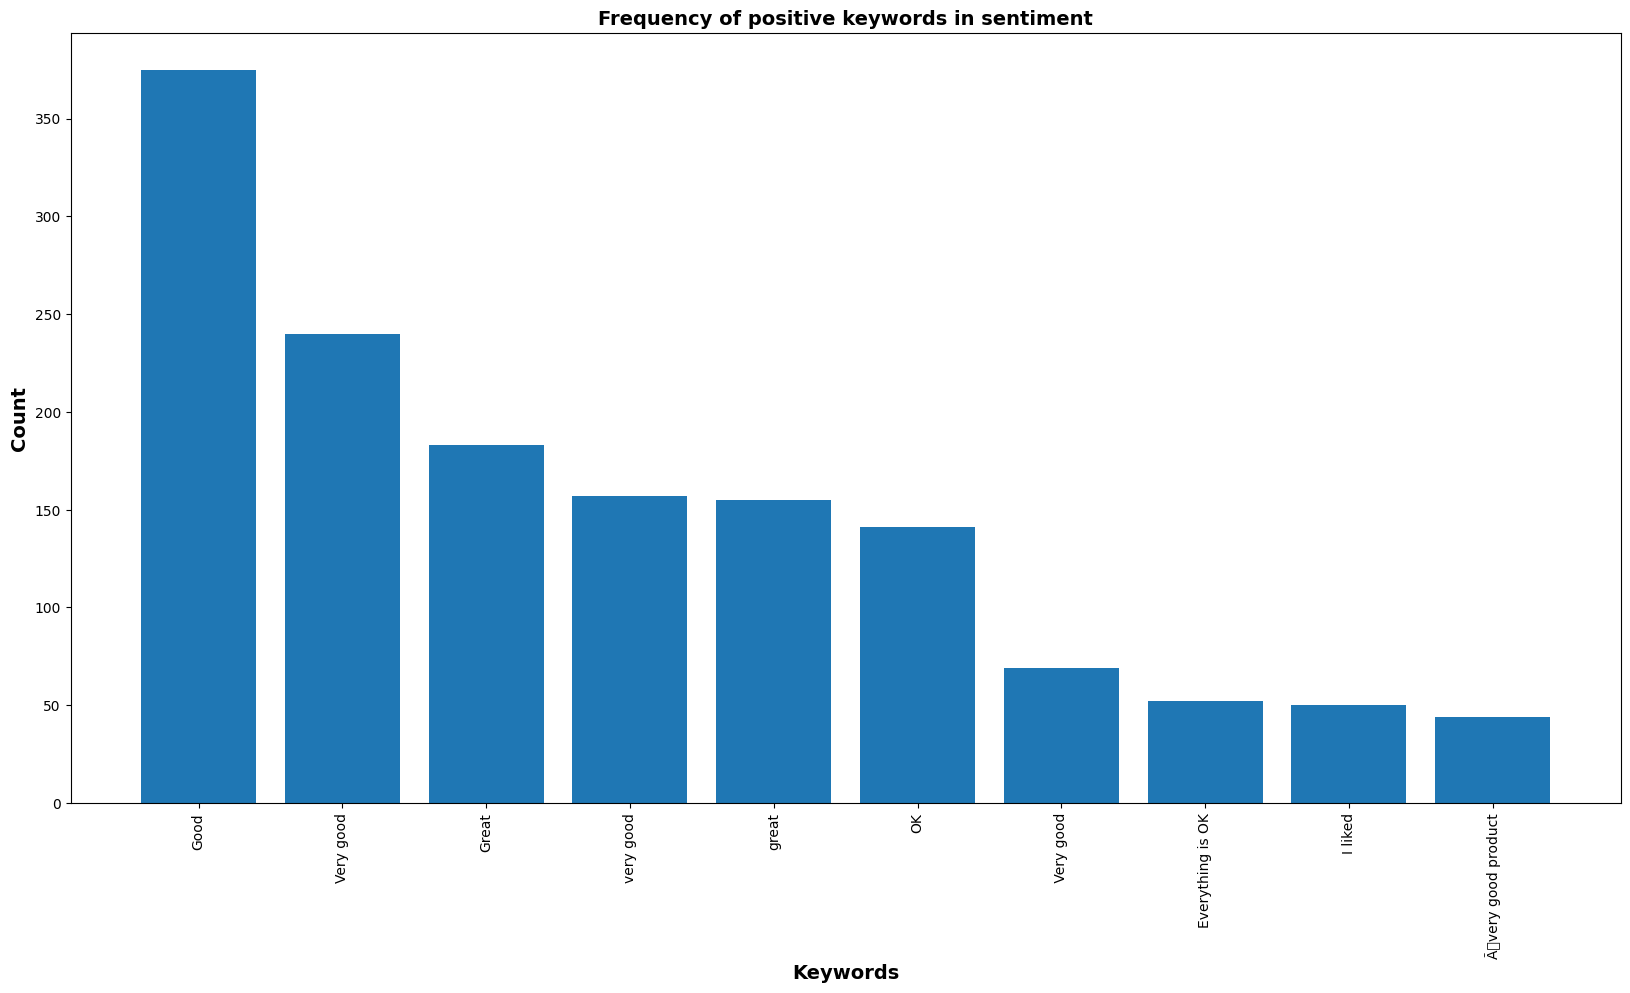

In [22]:
# Plotting the 10 common positive keywords
plt.figure(figsize=(20,10))

plt.bar(polar_pos_count['Keyword'], polar_pos_count['Count'])
plt.title("Frequency of positive keywords in sentiment", fontsize=14, weight='bold')
plt.xlabel("Keywords", fontsize=14, weight='bold')
plt.ylabel("Count", fontsize=14, weight='bold')
plt.xticks(rotation=90)
plt.show()

- We also analysed the common positive and negative keywords used in review messages by counting sentiment polarity. Using the review messages to evaluate positive and negative polarity, we get polarity values greater than 0 for positive and less than 0 for negative sentiment. We filter positive and negative sentiment messages using these polarity values and count the most frequent words and phrases appearing in reviews. We can see the most used words in the respective sentiments this way.

- We can see that a lot of positive reviews include these top 10 keywords such as Good, Very good, Great and so on. All of the words expressed positive sentiment towards the products quality most likely and these words are the most used in these reviews.

In [23]:
# Getting the commonly used keywords for negative sentiment
polar_neg_count = Counter(polar_neg['Review']).most_common(10)
polar_neg_count = pd.DataFrame(polar_neg_count)
polar_neg_count.columns=['Keyword','Count']
polar_neg_count

,Keyword,Count
0,Everything as expected,5
1,as expected,4
2,bad,4
3,It arrived before the expected time.,4
4,I received the wrong product.,4
5,The product arrived before the expected time.,4
6,very expensive shipping,4
7,disappointing.,4
8,Bad,4
9,I received the wrong product,4


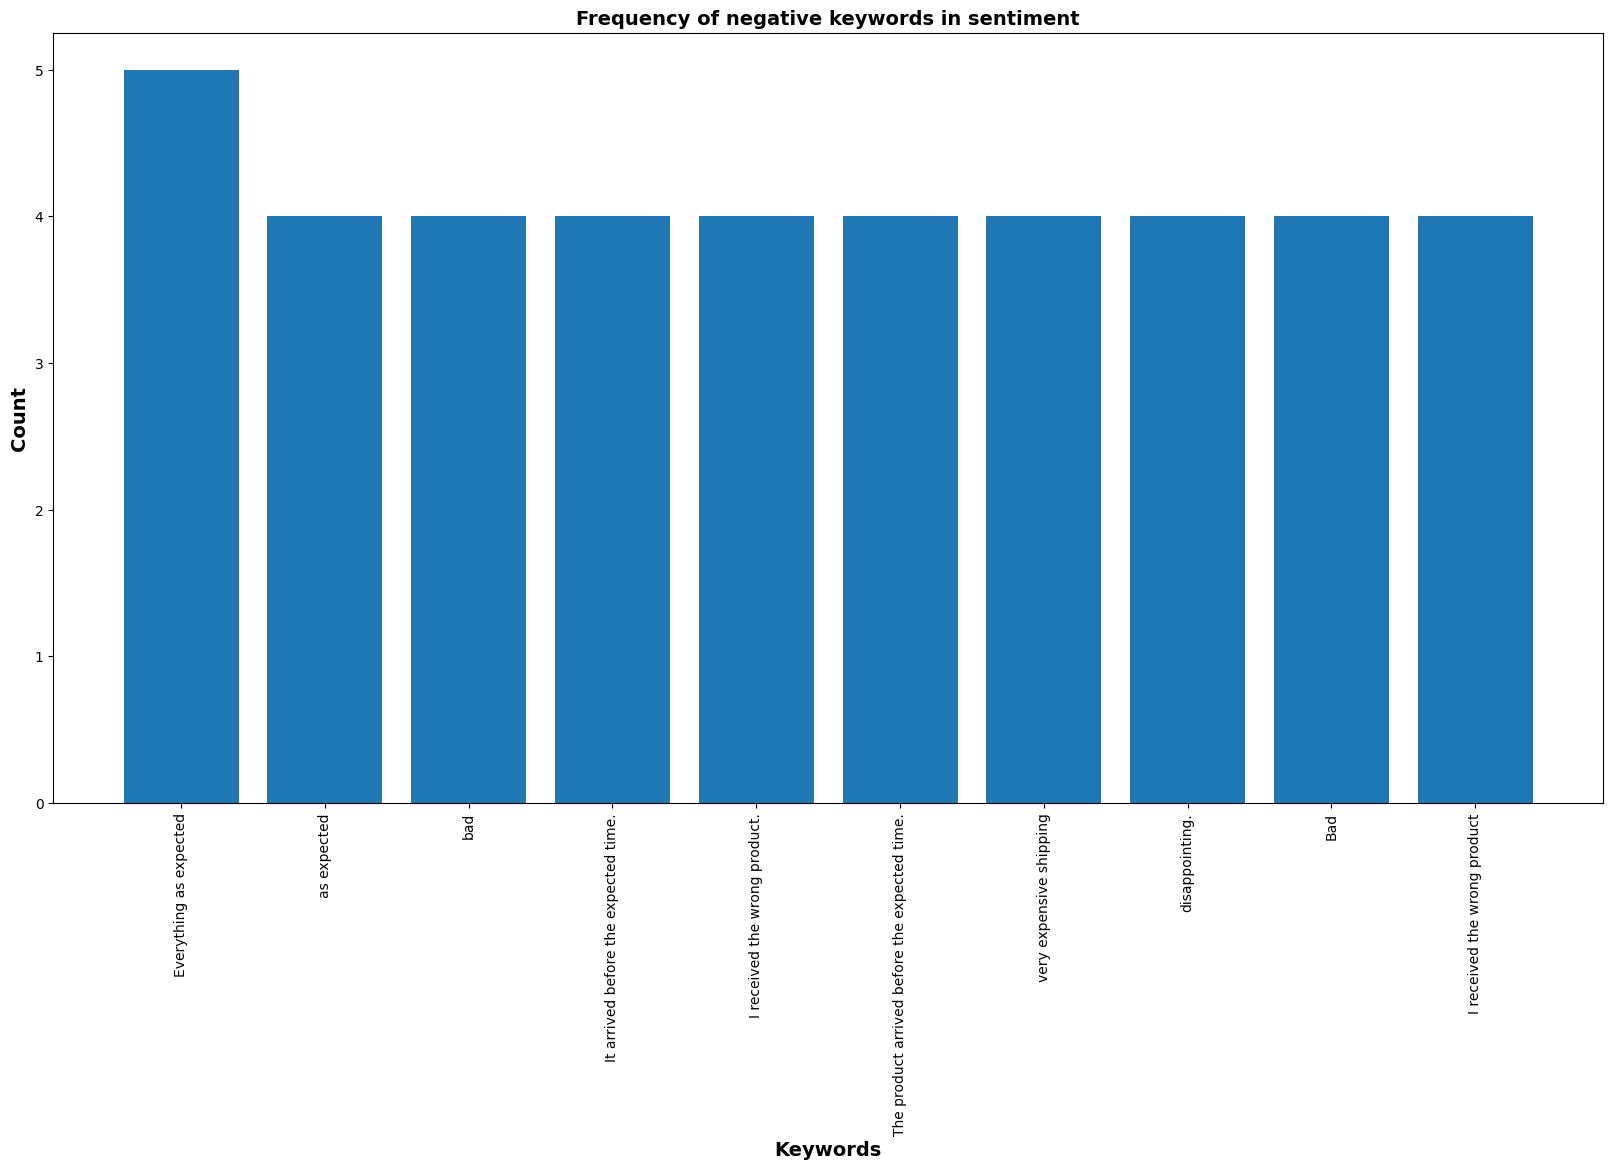

In [24]:
# Plotting the 10 common negative keywords

plt.figure(figsize=(20,10))

plt.bar(polar_neg_count['Keyword'], polar_neg_count['Count'])
plt.title("Frequency of negative keywords in sentiment", fontsize=14, weight='bold')
plt.xlabel("Keywords", fontsize=14, weight='bold')
plt.ylabel("Count", fontsize=14, weight='bold')
plt.xticks(rotation=90)
plt.show()

- From the negative reviews, we can see that these phrases are the most frequently used sentences to express negative sentiments. Most of them are related to the products being misdelivered, and delivery time.

In [25]:
# Merge reviews with orders
# Use the new reviews dataframe to include rows with empty comments to match with other datasets
reviews_orders = pd.merge(reviews_updated, orders_df, on='order_id', how='left')
# reviews_orders

# Merge the result with order items
reviews_orders_items = pd.merge(reviews_orders, order_items_df, on='order_id', how='left')
# reviews_orders_items

# Merge the result with products
full_data = pd.merge(reviews_orders_items, products_df, on='product_id', how='left')

# Check the first few rows and structure of the fully merged dataset
full_data.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:00,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:00,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:00,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:00,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-10-03 00:00:00,2018-11-03 03:05:00,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:00,...,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0,computers_accessories


In [26]:
# Calculate average review score for each product
product_sentiments = full_data.groupby(['product_id', 'product_category_name_english'])['review_score'].agg(['mean', 'count']).reset_index()

product_sentiments.head(10)

,product_id,product_category_name_english,mean,count
0,00066f42aeeb9f3007548bb9d3f33c38,perfumery,5.000000,1
1,00088930e925c41fd95ebfe695fd2655,auto,4.000000,1
2,0009406fd7479715e4bef61dd91f2462,bed_bath_table,1.000000,1
3,000b8f95fcb9e0096488278317764d19,housewares,5.000000,2
4,000d9be29b5207b54e86aa1b1ac54872,watches_gifts,5.000000,1
5,0011c512eb256aa0dbbb544d8dffcf6e,auto,1.000000,1
6,00126f27c813603687e6ce486d909d01,cool_stuff,5.000000,2
7,001795ec6f1b187d37335e1c4704762e,consoles_games,3.222222,9
8,001b237c0e9bb435f2e54071129237e9,bed_bath_table,5.000000,1
9,001b72dfd63e9833e8c02742adf472e3,furniture_decor,3.500000,14


In [27]:
# Filter out products with very few reviews to get a more reliable sentiment average
product_sentiments_filtered = product_sentiments[product_sentiments['count'] >= 10]

# Sort by the top 10 highest and lowest average review scores
top_positive_products = product_sentiments_filtered.sort_values(by='mean', ascending=False).head(10)
top_positive_products

,product_id,product_category_name_english,mean,count
2665,143c616ec3fe0cb065c3805cf9bd812e,garden_tools,5.0,12
17011,83aae8023b8feda53259f63e0ec06390,furniture_decor,5.0,10
31653,f5d8f4fbc70ca2a0038b9a0010ed5cb0,fashion_bags_accessories,5.0,10
7267,37eb69aca8718e843d897aa7b82f462d,garden_tools,5.0,15
1893,0e839be47c2dc028ca3d90e65732b14c,furniture_decor,5.0,10
3011,16ce899c7af0c99f46948734a0d00f0f,stationery,5.0,12
23884,b9ee7519d0187d2389af62ba6c612963,sports_leisure,5.0,10
14320,6ee7217ab647f3c2b4a5161c75cadab3,furniture_decor,5.0,11
5179,2722b7e5f68e776d18fe901638034e54,health_beauty,5.0,13
468,03e1c946c0ddfc58724ff262aef08dff,housewares,5.0,14


In [28]:
# Sorting alphabetically
top_positive_products_sorted = top_positive_products.sort_values(by='product_category_name_english')
top_positive_products_sorted

,product_id,product_category_name_english,mean,count
31653,f5d8f4fbc70ca2a0038b9a0010ed5cb0,fashion_bags_accessories,5.0,10
17011,83aae8023b8feda53259f63e0ec06390,furniture_decor,5.0,10
1893,0e839be47c2dc028ca3d90e65732b14c,furniture_decor,5.0,10
14320,6ee7217ab647f3c2b4a5161c75cadab3,furniture_decor,5.0,11
2665,143c616ec3fe0cb065c3805cf9bd812e,garden_tools,5.0,12
7267,37eb69aca8718e843d897aa7b82f462d,garden_tools,5.0,15
5179,2722b7e5f68e776d18fe901638034e54,health_beauty,5.0,13
468,03e1c946c0ddfc58724ff262aef08dff,housewares,5.0,14
23884,b9ee7519d0187d2389af62ba6c612963,sports_leisure,5.0,10
3011,16ce899c7af0c99f46948734a0d00f0f,stationery,5.0,12


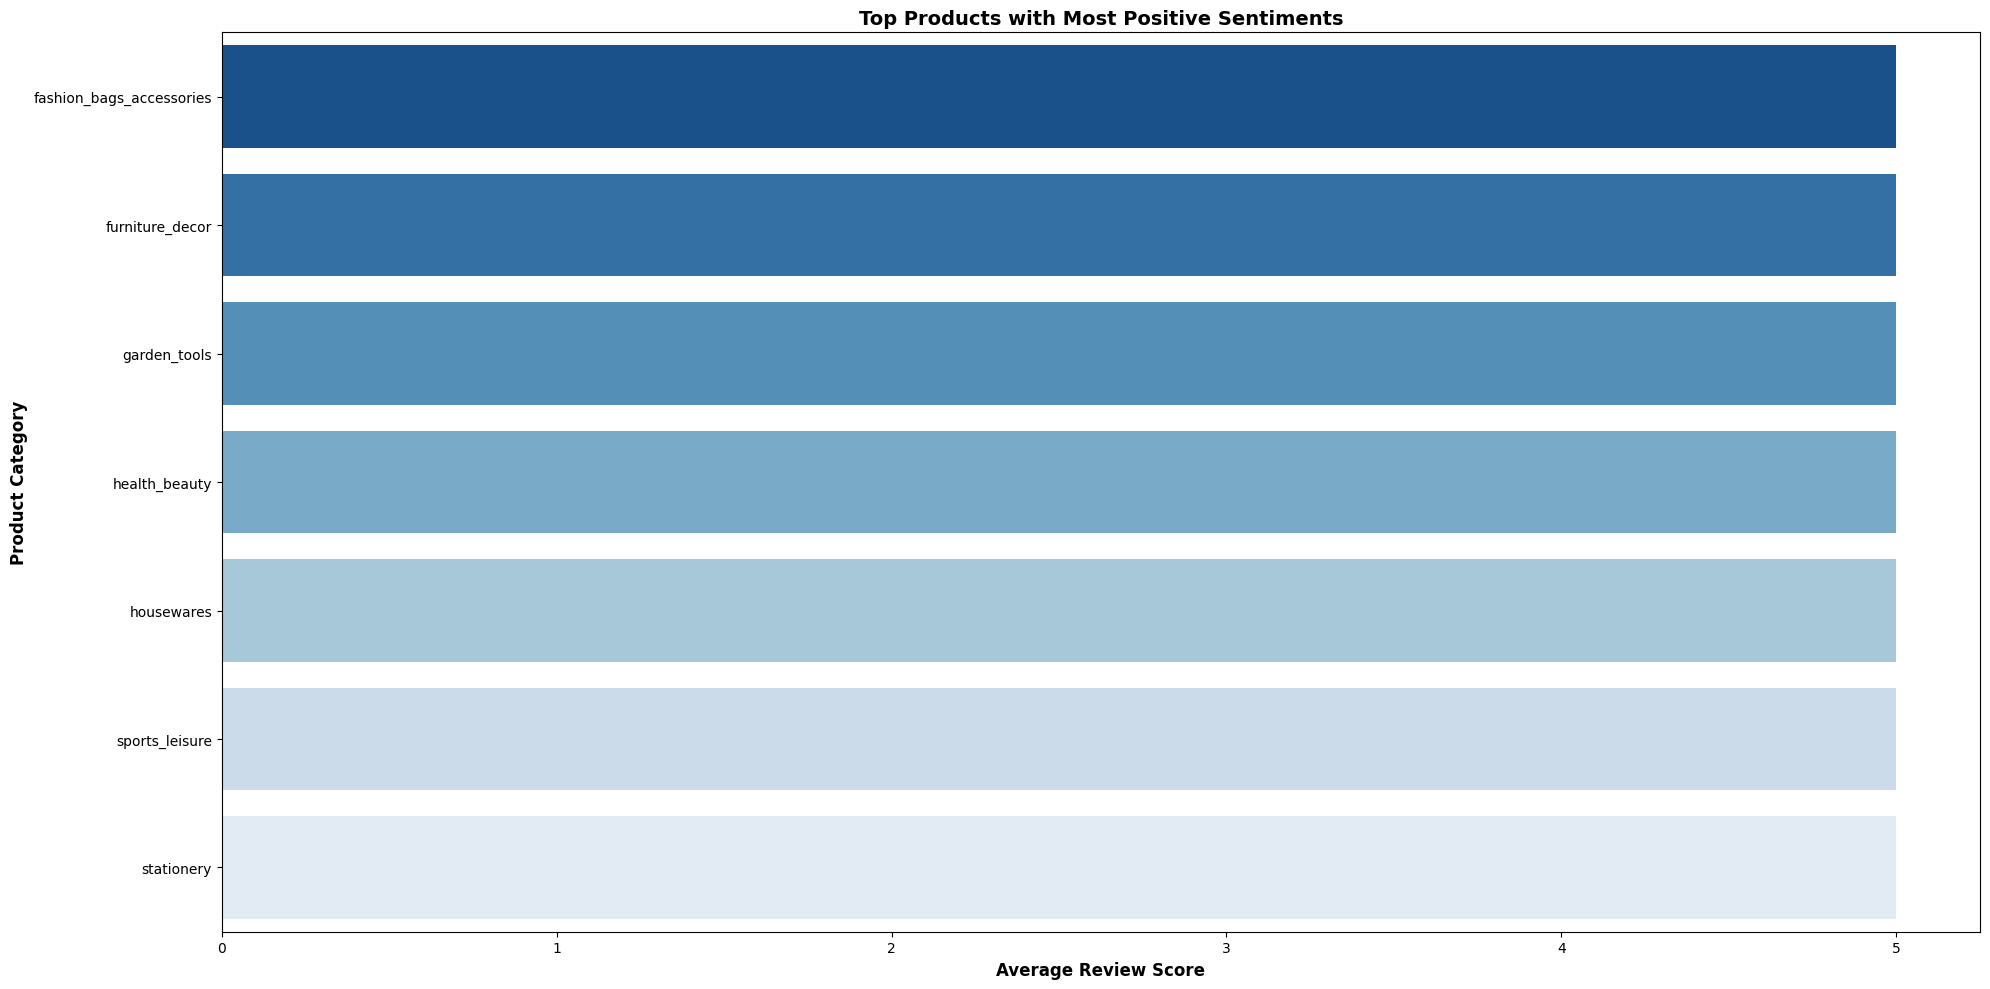

In [29]:
# Plot for top positive products
plt.figure(figsize=(20, 10))

sns.barplot(data=top_positive_products_sorted, x='mean', y='product_category_name_english', palette='Blues_r')
plt.title('Top Products with Most Positive Sentiments', fontsize=14, weight='bold')
plt.xlabel('Average Review Score', fontsize=12, weight='bold')
plt.ylabel('Product Category', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

- Next, we decided to explore what products received positive or negative sentiments. We merged the dataframes that include order, customer, and product columns with their respective ID columns into a new one. From this dataframe, we analysed the top 10 products with the most positive, negative, and neutral sentiments based on the average of the review scores given.

- From positive analysis, we can see that fashion, health, house related products, sports and stationery are associated with the positive sentiments. Although top 10 products were collected, most of them overlapped with one another. 


In [30]:
# Sorting values from highest to lowest
top_negative_products = product_sentiments_filtered.sort_values(by='mean', ascending=True).head(10)
top_negative_products

,product_id,product_category_name_english,mean,count
19178,9571759451b1d780ee7c15012ea109d4,auto,1.000000,20
5158,270516a3f41dc035aa87d220228f844c,health_beauty,1.000000,10
700,05b515fdc76e888aada3c6d66c201dff,health_beauty,1.000000,10
32325,fb29f48bfea41db52e349454f433340e,computers_accessories,1.000000,10
1845,0e1fa2aadc04afbf8fb30200aeba06a2,housewares,1.000000,10
16117,7c68e7297c7df2535c9f0dcd61007f64,furniture_decor,1.000000,10
24968,c230b471b7e21ff9060e68ee154afd70,unknown,1.117647,17
32553,fd0065af7f09af4b82a0ca8f3eed1852,auto,1.181818,11
8937,44a5d24dd383324a421569ca697b13c2,telephony,1.437500,16
22219,ad4b5def91ac7c575dbdf65b5be311f4,computers_accessories,1.545455,22


In [31]:
# Sorting alphabetically
top_negative_products_sorted = top_negative_products.sort_values(by='product_category_name_english')
top_negative_products_sorted

,product_id,product_category_name_english,mean,count
19178,9571759451b1d780ee7c15012ea109d4,auto,1.000000,20
32553,fd0065af7f09af4b82a0ca8f3eed1852,auto,1.181818,11
32325,fb29f48bfea41db52e349454f433340e,computers_accessories,1.000000,10
22219,ad4b5def91ac7c575dbdf65b5be311f4,computers_accessories,1.545455,22
16117,7c68e7297c7df2535c9f0dcd61007f64,furniture_decor,1.000000,10
5158,270516a3f41dc035aa87d220228f844c,health_beauty,1.000000,10
700,05b515fdc76e888aada3c6d66c201dff,health_beauty,1.000000,10
1845,0e1fa2aadc04afbf8fb30200aeba06a2,housewares,1.000000,10
8937,44a5d24dd383324a421569ca697b13c2,telephony,1.437500,16
24968,c230b471b7e21ff9060e68ee154afd70,unknown,1.117647,17


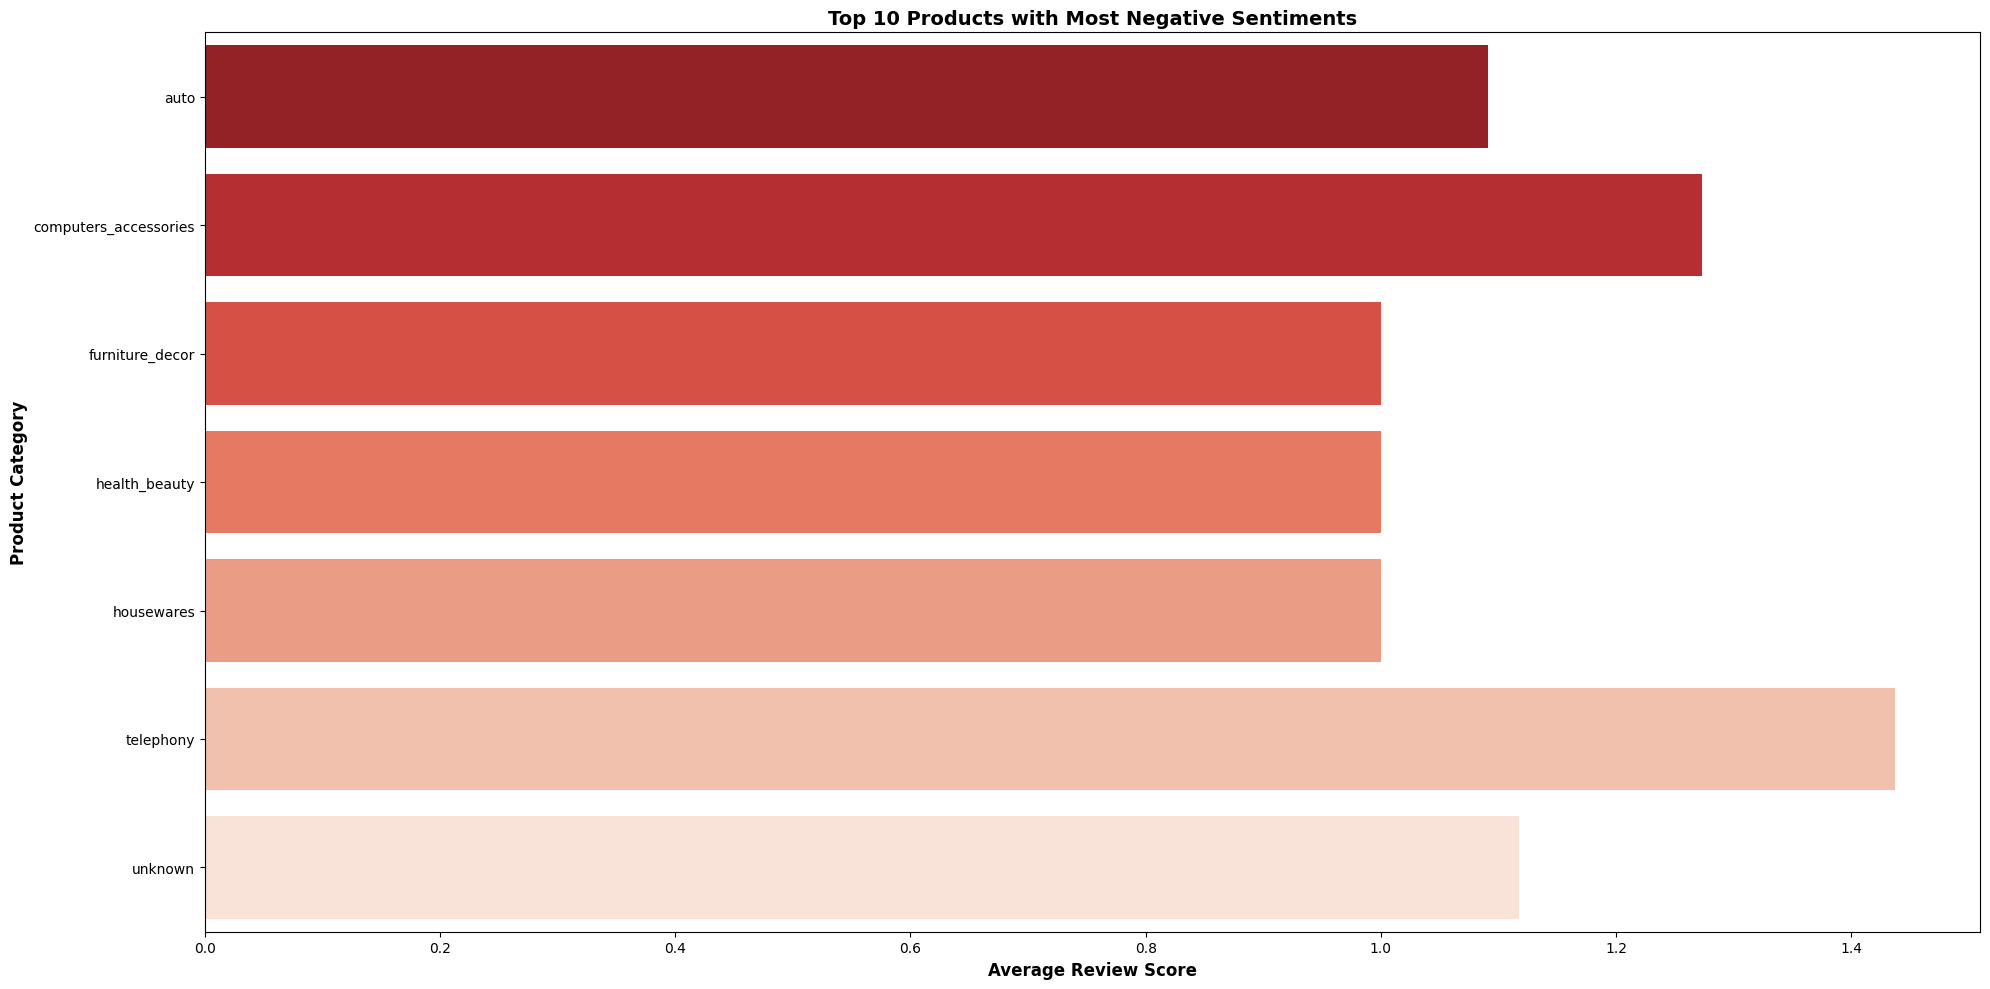

In [32]:
# Plot for top negative products
plt.figure(figsize=(20,10)) 
sns.barplot(data=top_negative_products_sorted, x='mean', y='product_category_name_english', palette='Reds_r', errorbar=None)
plt.title('Top 10 Products with Most Negative Sentiments', fontsize=14, weight='bold')
plt.xlabel('Average Review Score', fontsize=12, weight='bold')
plt.ylabel('Product Category', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

- From negative analysis, we learnt that computer and telephone products are associated the most with negative sentiment. 

In [33]:
# Getting neutral reviewd data
neutral_reviews = full_data[full_data['review_score'] == 3]
product_neutral_sentiments = neutral_reviews.groupby(['product_id', 'product_category_name_english'])['review_id'].count().reset_index(name='neutral_count')

product_neutral_sentiments

,product_id,product_category_name_english,neutral_count
0,001b72dfd63e9833e8c02742adf472e3,furniture_decor,2
1,002552c0663708129c0019cc97552d7d,cool_stuff,1
2,003c0b8f6580c850bd2e32044d2ac307,kitchen_dining_laundry_garden_furniture,2
3,005030ef108f58b46b78116f754d8d38,perfumery,1
4,0075c14603d80515e20908c156ceb47b,sports_leisure,1
...,...,...,...
5666,ffbe3df3856b1fef3fee8f1264105a89,health_beauty,1
5667,ffc88104d219c1b767d566fd93653dd2,housewares,1
5668,ffc9caf33e2d1e9f44e3e06da19085f7,health_beauty,3
5669,ffd4bf4306745865e5692f69bd237893,fashion_bags_accessories,2


In [34]:
# Sorting the top 10 highest neutral review counts
top_neutral_products = product_neutral_sentiments.sort_values(by='neutral_count', ascending=False).head(10)
top_neutral_products

,product_id,product_category_name_english,neutral_count
3347,99a4788cb24856965c36a24e339b6058,bed_bath_table,69
3811,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,63
1842,53759a2ecddad2bb87a079a1f1519f73,garden_tools,38
1240,389d119b48cf3043d311335e499d9c6b,garden_tools,29
2731,7c1bd920dbdf22470b68bde975dd3ccf,health_beauty,29
1446,422879e10f46682990de24d770e7f83d,garden_tools,29
1186,368c6c730842d78016ad823897a372db,garden_tools,28
3650,a62e25e09e05e6faf31d90c6ec1aa3d1,watches_gifts,27
956,2b4609f8948be18874494203496bc318,health_beauty,25
1165,35afc973633aaeb6b877ff57b2793310,home_confort,25


In [35]:
# Sorting alphabetically
top_neutral_products_sorted = top_neutral_products.sort_values(by='product_category_name_english')
top_neutral_products_sorted

,product_id,product_category_name_english,neutral_count
3347,99a4788cb24856965c36a24e339b6058,bed_bath_table,69
3811,aca2eb7d00ea1a7b8ebd4e68314663af,furniture_decor,63
1842,53759a2ecddad2bb87a079a1f1519f73,garden_tools,38
1240,389d119b48cf3043d311335e499d9c6b,garden_tools,29
1446,422879e10f46682990de24d770e7f83d,garden_tools,29
1186,368c6c730842d78016ad823897a372db,garden_tools,28
2731,7c1bd920dbdf22470b68bde975dd3ccf,health_beauty,29
956,2b4609f8948be18874494203496bc318,health_beauty,25
1165,35afc973633aaeb6b877ff57b2793310,home_confort,25
3650,a62e25e09e05e6faf31d90c6ec1aa3d1,watches_gifts,27


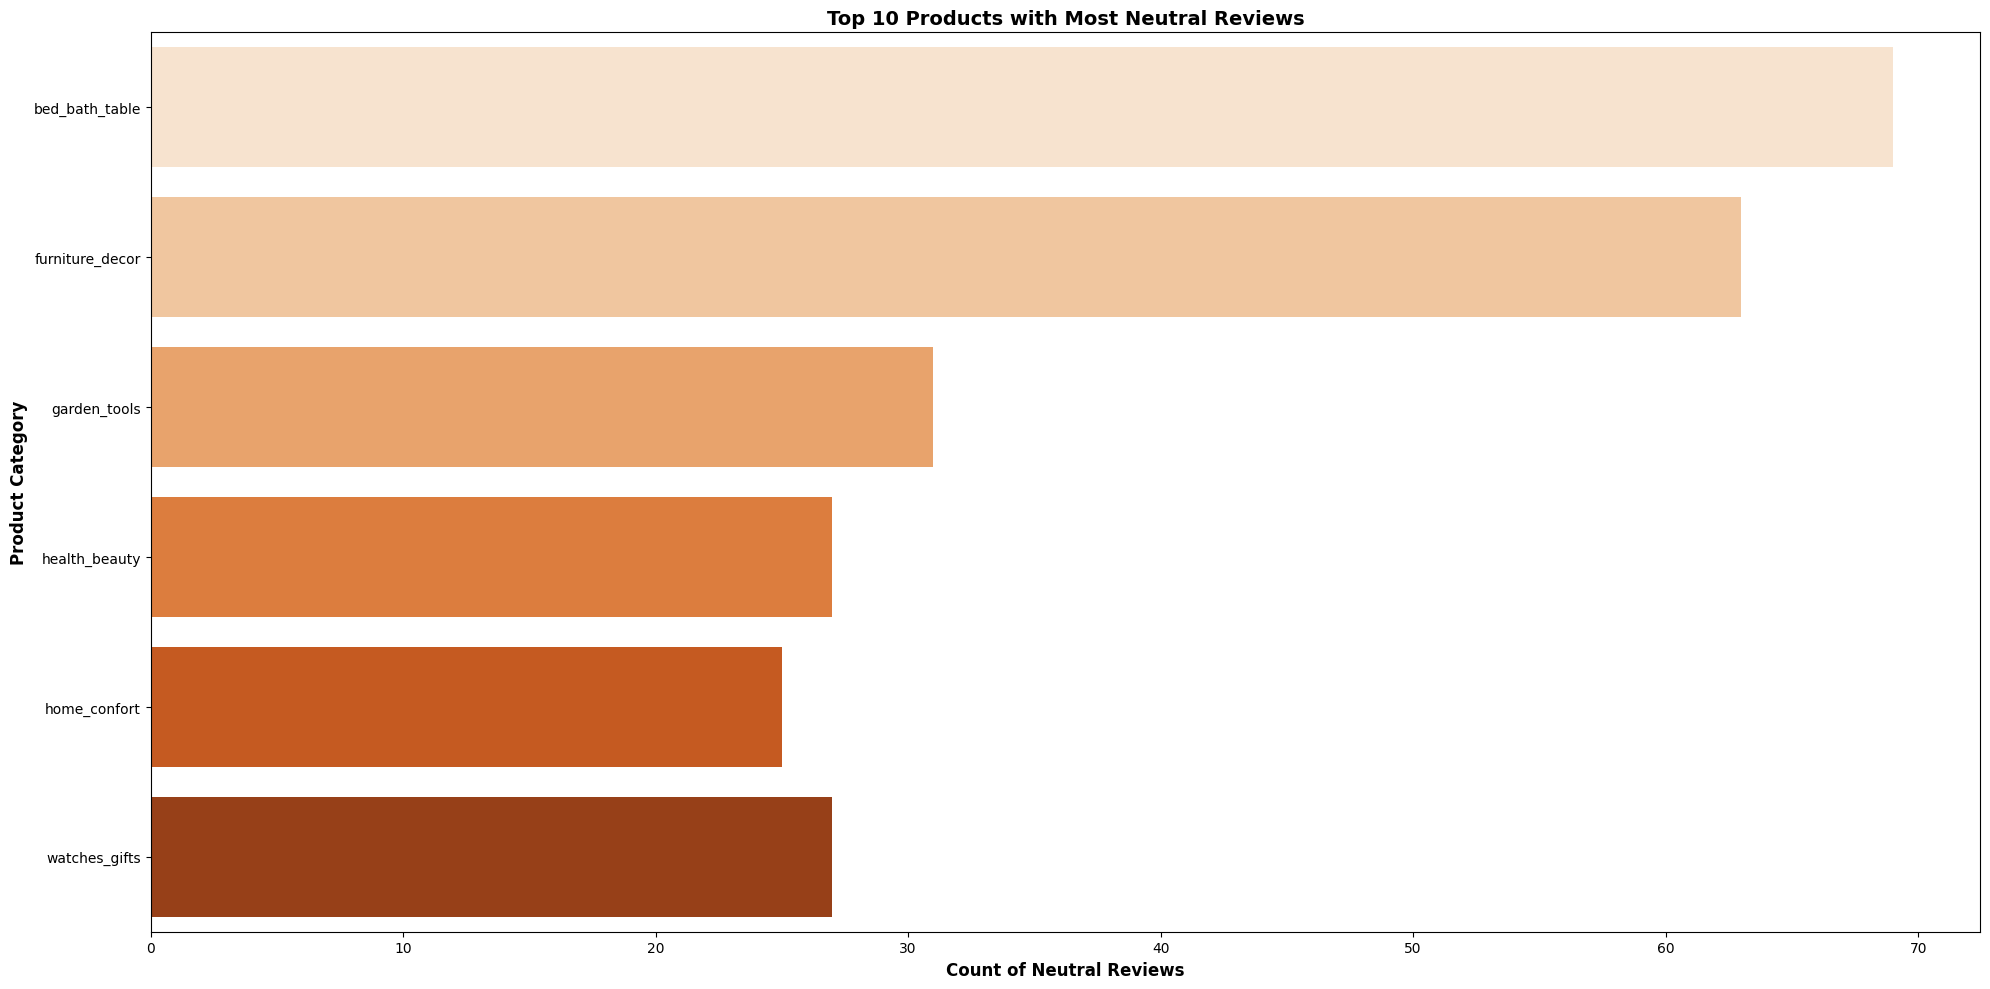

In [36]:
# Plot for neutral reviewd products
plt.figure(figsize=(20,10))

sns.barplot(data=top_neutral_products_sorted, x='neutral_count', y='product_category_name_english', palette='Oranges', errorbar=None)
plt.title('Top 10 Products with Most Neutral Reviews', fontsize=14, weight='bold')
plt.xlabel('Count of Neutral Reviews', fontsize=12, weight='bold')
plt.ylabel('Product Category', fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

- We learnt from this chart that bed_bath product and furniture products received the most neutral reviews.

In [37]:
# Categorize review scores into positive (4, 5), neutral (3) and negative (1, 2)
full_data['sentiment'] = pd.cut(full_data['review_score'], bins=[0, 2, 3, 5], labels=['negative', 'neutral', 'positive'], right=True)

full_data[['review_id','order_id','product_id','customer_id','review_score','review_comment_message','sentiment']].head(5)

,review_id,order_id,product_id,customer_id,review_score,review_comment_message,sentiment
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,fd25ab760bfbba13c198fa3b4f1a0cd3,41dcb106f807e993532d446263290104,4,,positive
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,fd25ab760bfbba13c198fa3b4f1a0cd3,41dcb106f807e993532d446263290104,4,,positive
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,be0dbdc3d67d55727a65d4cd696ca73c,8a2e7ef9053dea531e4dc76bd6d853e6,5,,positive
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,d1c427060a0f73f6b889a5c7c61f2ac4,e226dfed6544df5b7b87a48208690feb,5,,positive
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,52c80cedd4e90108bf4fa6a206ef6b03,de6dff97e5f1ba84a3cd9a3bc97df5f6,5,received it well before the stipulated time.,positive


In [38]:
# Group by product category and sentiment to count occurrences
category_sentiments = full_data.groupby(['product_category_name_english', 'sentiment'])['review_id'].count()
category_sentiments

product_category_name_english  sentiment
agro_industry_and_commerce     negative       34
                               neutral        13
                               positive      165
air_conditioning               negative       57
                               neutral        24
                                            ... 
unknown                        neutral       105
                               positive     1158
watches_gifts                  negative     1001
                               neutral       541
                               positive     4459
Name: review_id, Length: 216, dtype: int64

In [39]:
# Unstacking to plot
category_sentiments = full_data.groupby(['product_category_name_english', 'sentiment'])['review_id'].count().unstack().fillna(0)

# Filter to keep only scored sentiments
# category_sentiments = category_sentiments[['positive', 'negative','neutral']]

# Normalize counts by total number of reviews per category to compare across categories with different review counts
category_sentiments['total'] = category_sentiments.sum(axis=1)
category_sentiments['positive_pct'] = category_sentiments['positive'] / category_sentiments['total']
category_sentiments['neutral_pct'] = category_sentiments['neutral'] / category_sentiments['total']
category_sentiments['negative_pct'] = category_sentiments['negative'] / category_sentiments['total']

category_sentiments.head(5)

sentiment,negative,neutral,positive,total,positive_pct,neutral_pct,negative_pct
product_category_name_english,,,,,,,
agro_industry_and_commerce,34,13,165,212,0.778302,0.061321,0.160377
air_conditioning,57,24,216,297,0.727273,0.080808,0.191919
art,39,19,151,209,0.722488,0.090909,0.186603
arts_and_craftmanship,3,3,18,24,0.750000,0.125000,0.125000
audio,81,37,247,365,0.676712,0.101370,0.221918


In [40]:
# Sorting categories by total to focus on those with substantial data
category_sentiments_sorted = category_sentiments.sort_values(by='total', ascending=False)
category_sentiments_sorted.head(10)

sentiment,negative,neutral,positive,total,positive_pct,neutral_pct,negative_pct
product_category_name_english,,,,,,,
bed_bath_table,2209,1131,7932,11272,0.703691,0.100337,0.195972
health_beauty,1377,772,7579,9728,0.779091,0.079359,0.141550
sports_leisure,1302,647,6752,8701,0.776003,0.074359,0.149638
furniture_decor,1676,765,5975,8416,0.709957,0.090898,0.199144
computers_accessories,1490,650,5755,7895,0.728942,0.082331,0.188727
housewares,1124,597,5268,6989,0.753756,0.085420,0.160824
watches_gifts,1001,541,4459,6001,0.743043,0.090152,0.166806
telephony,782,461,3307,4550,0.726813,0.101319,0.171868
garden_tools,715,353,3293,4361,0.755102,0.080945,0.163953


In [41]:
# Sorting the categories alphabetically
category_sentiments_sorted_alpha = category_sentiments_sorted.sort_index()
category_sentiments_sorted_alpha

sentiment,negative,neutral,positive,total,positive_pct,neutral_pct,negative_pct
product_category_name_english,,,,,,,
agro_industry_and_commerce,34,13,165,212,0.778302,0.061321,0.160377
air_conditioning,57,24,216,297,0.727273,0.080808,0.191919
art,39,19,151,209,0.722488,0.090909,0.186603
arts_and_craftmanship,3,3,18,24,0.750000,0.125000,0.125000
audio,81,37,247,365,0.676712,0.101370,0.221918
...,...,...,...,...,...,...,...
tablets_printing_image,13,6,64,83,0.771084,0.072289,0.156627
telephony,782,461,3307,4550,0.726813,0.101319,0.171868
toys,578,319,3228,4125,0.782545,0.077333,0.140121


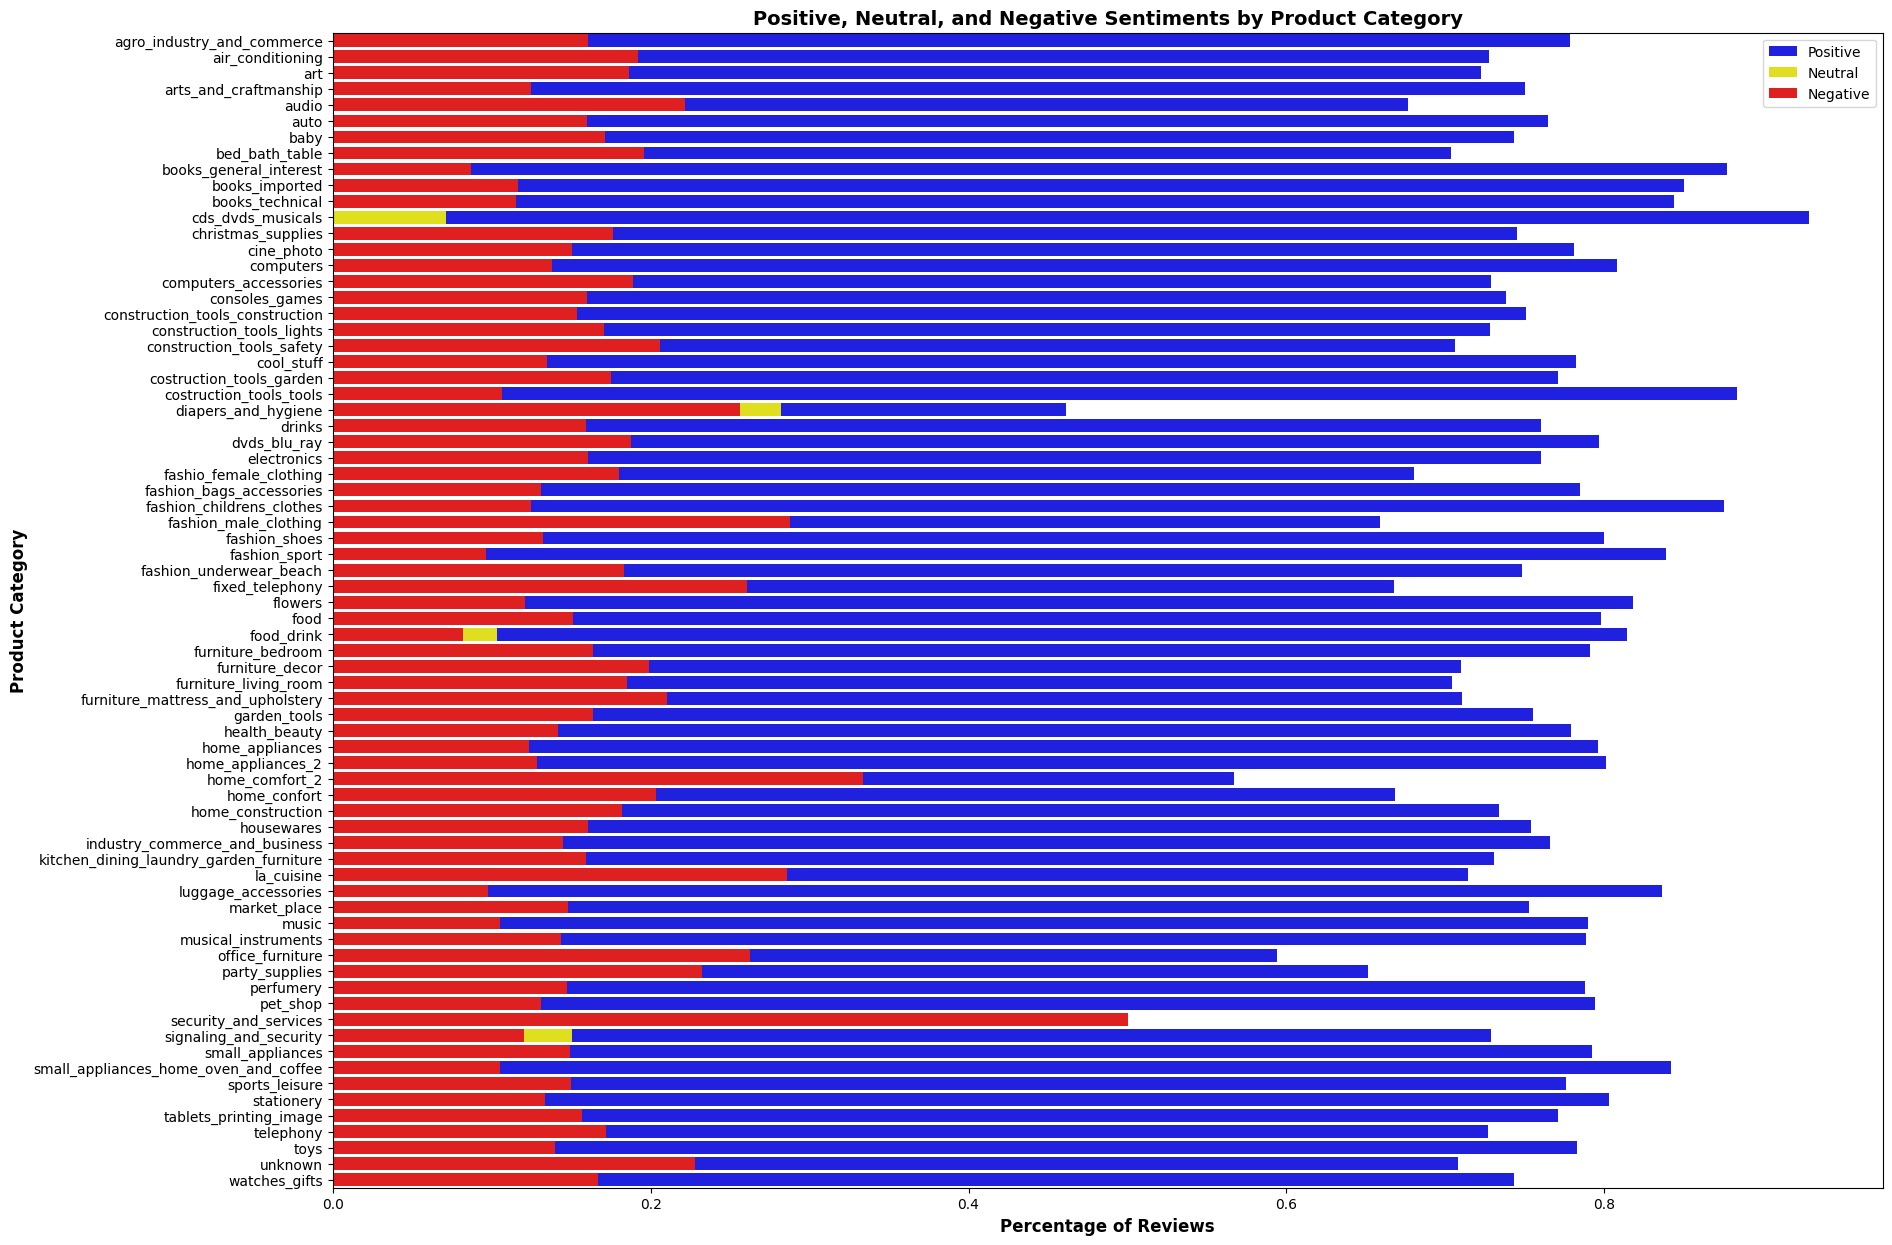

In [42]:
# Plotting
plt.figure(figsize=(20, 15))
sns.barplot(data=category_sentiments_sorted_alpha, x='positive_pct', y=category_sentiments_sorted_alpha.index, color='blue', label='Positive')
sns.barplot(data=category_sentiments_sorted_alpha, x='neutral_pct', y=category_sentiments_sorted_alpha.index, color='yellow', label='Neutral')
sns.barplot(data=category_sentiments_sorted_alpha, x='negative_pct', y=category_sentiments_sorted_alpha.index, color='red', label='Negative')

plt.title('Positive, Neutral, and Negative Sentiments by Product Category', fontsize=14, weight='bold')
plt.xlabel('Percentage of Reviews', fontsize=12, weight='bold')
plt.ylabel('Product Category', fontsize=12, weight='bold')
plt.legend()

plt.show()


- We performed a grouped sentiment analysis for each product category to compare which category is associated with the most sentiment and visualise the sentiments for each category. From this bar plot, we can see that about 80% of the reviews have positive sentiments while less than 40% of reviews include negative sentiments. However, we also noticed that a product category, 'security_and_service' has the most amount of negative sentiment than others.

In [43]:
# Full data that includes products and reviews together for product_based review analysis.
# Make categories for product dimensions: small, medium, and large based on length and width.

# Define bins for length and width
length_bins = [0, 30, 60, float('inf')]  # Small, Medium, Large
width_bins = [0, 30, 60, float('inf')]   # Small, Medium, Large
length_labels = ['Small', 'Medium', 'Large']
width_labels = ['Small', 'Medium', 'Large']

# Bin data into categories
full_data['length_category'] = pd.cut(full_data['product_length_cm'], bins=length_bins, labels=length_labels)
full_data['width_category'] = pd.cut(full_data['product_width_cm'], bins=width_bins, labels=width_labels)

full_data.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,sentiment,length_category,width_category
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:00,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:00,...,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure,positive,Small,Medium
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:00,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:00,...,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure,positive,Small,Medium
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-10-03 00:00:00,2018-11-03 03:05:00,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:00,...,493.0,1.0,245.0,19.0,14.0,14.0,computers_accessories,positive,Small,Small
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17 00:00:00,2018-02-18 14:36:00,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:00,...,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,positive,Small,Small
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,received it well before the stipulated time.,2017-04-21 00:00:00,2017-04-21 22:02:00,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:00,...,2188.0,2.0,7650.0,20.0,20.0,20.0,garden_tools,positive,Small,Small


In [44]:
# Combine the categories of dimensions into pairs for simplification
full_data['size_category'] = full_data['length_category'].astype(str) + "_" + full_data['width_category'].astype(str)
full_data.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,sentiment,length_category,width_category,size_category
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:00,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:00,...,1.0,1300.0,30.0,30.0,35.0,sports_leisure,positive,Small,Medium,Small_Medium
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,,,2018-01-18 00:00:00,2018-01-18 21:46:00,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:00,...,1.0,1300.0,30.0,30.0,35.0,sports_leisure,positive,Small,Medium,Small_Medium
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,,,2018-10-03 00:00:00,2018-11-03 03:05:00,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:00,...,1.0,245.0,19.0,14.0,14.0,computers_accessories,positive,Small,Small,Small_Small
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,,,2018-02-17 00:00:00,2018-02-18 14:36:00,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:00,...,1.0,6550.0,20.0,20.0,20.0,computers_accessories,positive,Small,Small,Small_Small
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,,received it well before the stipulated time.,2017-04-21 00:00:00,2017-04-21 22:02:00,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:00,...,2.0,7650.0,20.0,20.0,20.0,garden_tools,positive,Small,Small,Small_Small


In [45]:
# Now group by these new categories and calculate average sentiment score
size_sentiment = full_data.groupby('size_category')['review_score'].agg(['mean', 'count']).reset_index()
size_sentiment

,size_category,mean,count
0,Large_Large,4.019950,802
1,Large_Medium,3.978583,2428
2,Large_Small,3.888688,2767
3,Medium_Large,3.981132,265
4,Medium_Medium,3.965427,15590
5,Medium_Small,3.999485,17486
6,Small_Large,3.827586,232
7,Small_Medium,4.097431,3387
8,Small_Small,4.033539,70365
9,nan_nan,1.719794,778


In [46]:
size_sentiment = size_sentiment[size_sentiment['count'] > 50]  # Filtering out categories with very few samples
size_sentiment

,size_category,mean,count
0,Large_Large,4.019950,802
1,Large_Medium,3.978583,2428
2,Large_Small,3.888688,2767
3,Medium_Large,3.981132,265
4,Medium_Medium,3.965427,15590
5,Medium_Small,3.999485,17486
6,Small_Large,3.827586,232
7,Small_Medium,4.097431,3387
8,Small_Small,4.033539,70365
9,nan_nan,1.719794,778


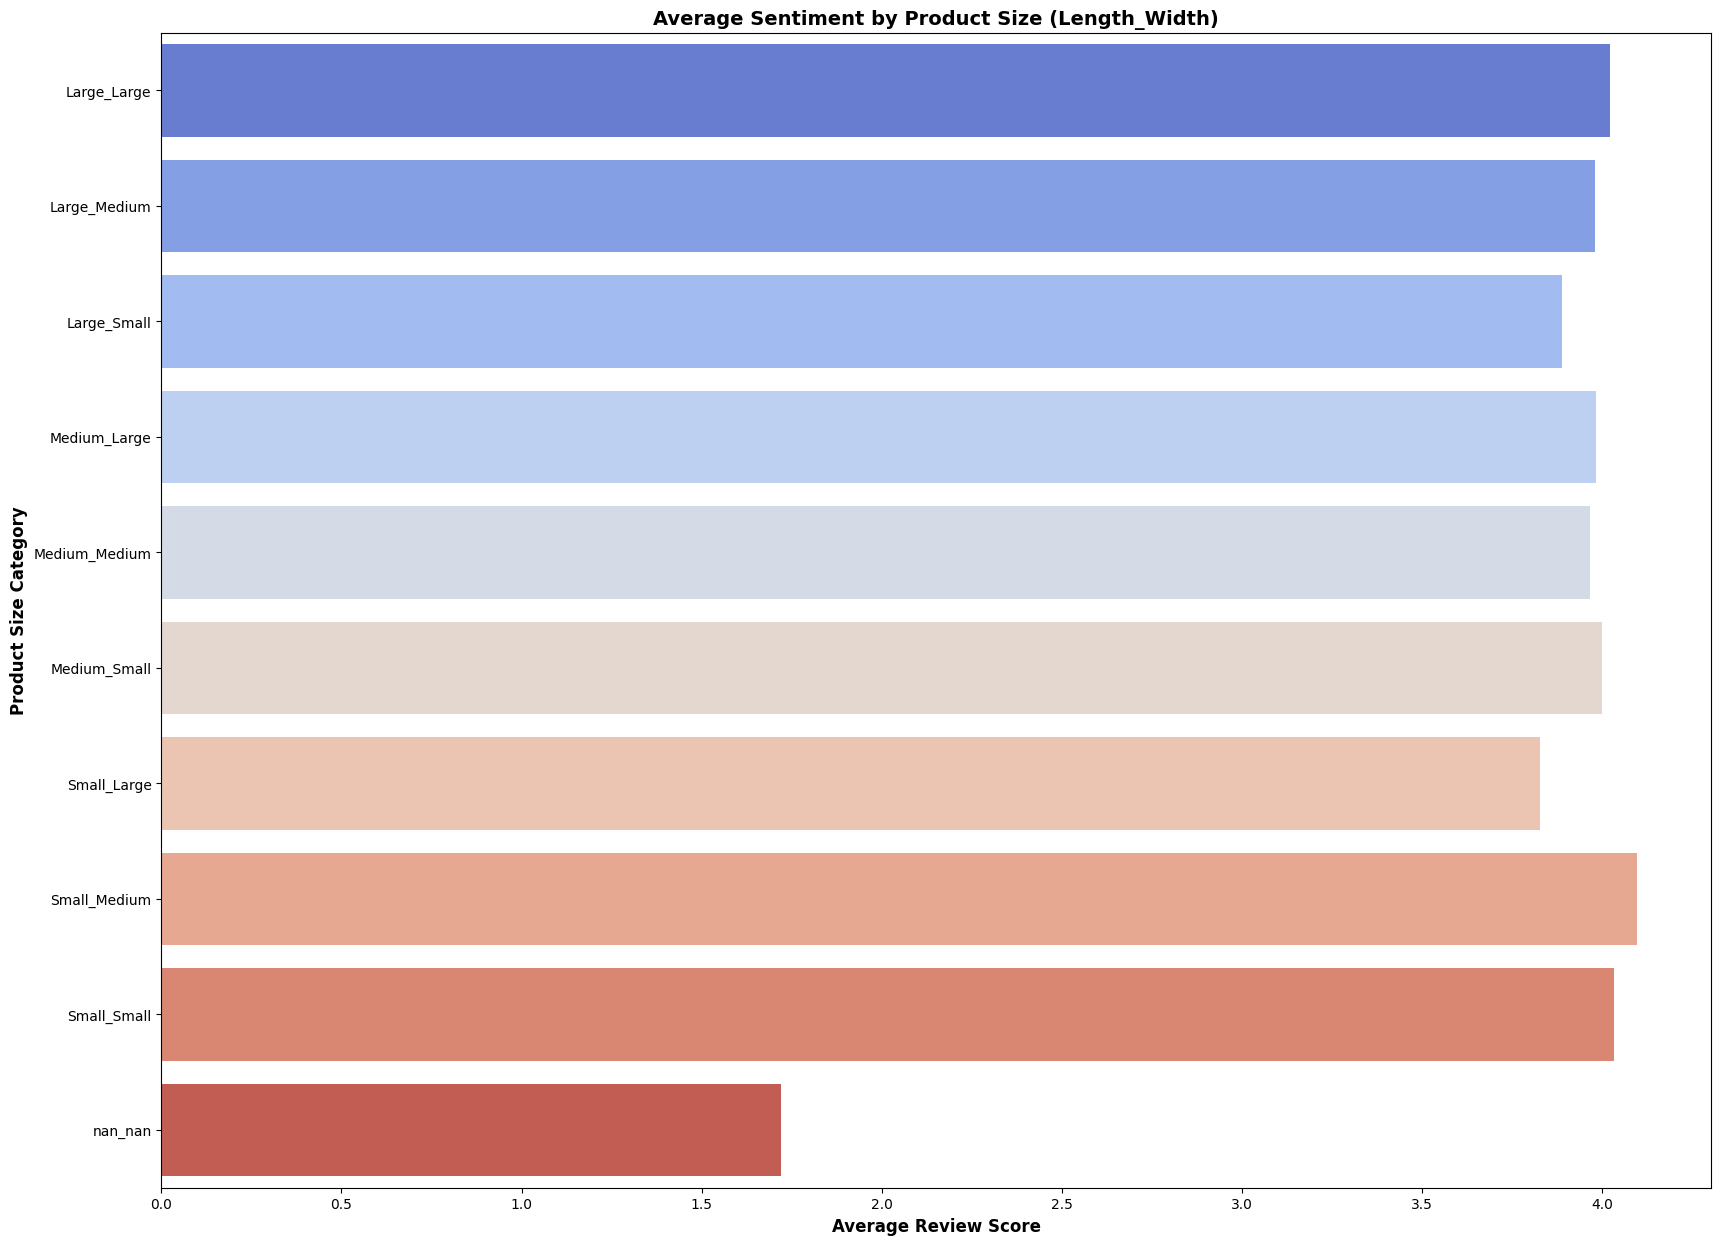

In [47]:
# Plotting sentiment by Product size
plt.figure(figsize=(20, 15))
sns.barplot(data=size_sentiment, x='mean', y='size_category', palette="coolwarm")
plt.title('Average Sentiment by Product Size (Length_Width)',fontsize=14, weight='bold')
plt.xlabel('Average Review Score',fontsize=12, weight='bold')
plt.ylabel('Product Size Category',fontsize=12, weight='bold')
plt.show()

- We also analysed which types of products received positive or negative sentiments by analysing product dimensions and reviews together. We calculated the product dimensions from small to large for width and length. We added a categorical label that pairs the product dimension sizes as ‘length_width’ to see which review_score each category receives. From the analysis, we can see that products with small length and medium width received the most positive sentiment by calculating the average of review scores received.